## Digit Recognizer

This model is a part of the kaggle competition (https://www.kaggle.com/c/digit-recognizer)


### Data
The data files train.csv and test.csv contain gray-scale images of hand-drawn digits, from zero through nine.

Each image is 28 pixels in height and 28 pixels in width, for a total of 784 pixels in total. Each pixel has a single pixel-value associated with it, indicating the lightness or darkness of that pixel, with higher numbers meaning darker. This pixel-value is an integer between 0 and 255, inclusive.

The training data set, (train.csv), has 785 columns. The first column, called "label", is the digit that was drawn by the user. The rest of the columns contain the pixel-values of the associated image.

For about data at https://www.kaggle.com/c/digit-recognizer/data

In [0]:
#get the data

import pandas as pd
import numpy as np


train = pd.read_csv('./train.csv', delimiter = ',')
test = pd.read_csv('./test.csv', ',')

In [62]:
train.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,...,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [63]:
print(train.shape)
print(test.shape)

(42000, 785)
(28000, 784)


In [64]:
train['label'][0]

1

In [0]:
label_train = train['label']
train = train.drop('label', axis=1)




LABEL: 0


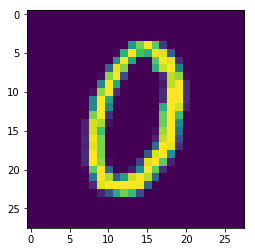

In [66]:
#Lets visualize few images for fun.
import matplotlib.pyplot as plt
train_image = np.split(train.iloc[5], 28)
plt.imshow(train_image)
print("LABEL: {}".format(label_train[5]))

In [0]:


IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS = 28, 28, 1


train = train.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)
test = test.values.reshape(-1, IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)




In [68]:
test.shape

(28000, 28, 28, 1)

In [0]:
#label 
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split

label_train = to_categorical(label_train)


x_train, x_validation, y_train, y_validation = train_test_split(train,
                                                                      label_train,
                                                                      test_size=0.2,
                                                                      shuffle = True)

In [0]:
# Model
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D

model = Sequential()
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 padding='Same', 
                 activation='relu',
                 input_shape=(IMAGE_WIDTH, IMAGE_HEIGHT, CHANNELS)))
model.add(Dropout(0.2))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Conv2D(filters=32,
                 kernel_size=(5,5),
                 padding='Same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.2))
model.add(Conv2D(filters=64, kernel_size=(3,3),padding='Same', 
                 activation='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation="softmax"))

model.compile(optimizer='adam', loss = 'categorical_crossentropy', metrics=['acc'])


In [0]:
#Augmentation
from keras.preprocessing.image import ImageDataGenerator
data_generator = ImageDataGenerator(rescale=1./255,
                                    rotation_range=1,
                                    zoom_range=0.1, 
                                    width_shift_range=0.05,
                                    height_shift_range=0.05)


data_generator.fit(x_train)

In [81]:
# Training
history = model.fit_generator(data_generator.flow(x_train,
                                                  y_train,
                                                  batch_size=128),
                              epochs=100,
                              validation_data=(x_validation, y_validation),
                              verbose=1,
                              steps_per_epoch=x_train.shape[0] // 128)

Epoch 1/100
262/262 [==============================] - 15s 58ms/step - loss: 0.8963 - acc: 0.6945 - val_loss: 0.5942 - val_acc: 0.9626
Epoch 2/100
262/262 [==============================] - 13s 51ms/step - loss: 0.2252 - acc: 0.9334 - val_loss: 0.3599 - val_acc: 0.9770
Epoch 3/100
262/262 [==============================] - 13s 52ms/step - loss: 0.1605 - acc: 0.9547 - val_loss: 0.3112 - val_acc: 0.9801
Epoch 4/100
262/262 [==============================] - 14s 52ms/step - loss: 0.1347 - acc: 0.9628 - val_loss: 0.2701 - val_acc: 0.9832
Epoch 5/100
262/262 [==============================] - 13s 51ms/step - loss: 0.1131 - acc: 0.9682 - val_loss: 0.2187 - val_acc: 0.9862
Epoch 6/100
262/262 [==============================] - 13s 51ms/step - loss: 0.1056 - acc: 0.9716 - val_loss: 0.2402 - val_acc: 0.9848
Epoch 7/100
262/262 [==============================] - 13s 51ms/step - loss: 0.0935 - acc: 0.9744 - val_loss: 0.2038 - val_acc: 0.9871
Epoch 8/100
262/262 [==============================] - 

In [82]:
# serialize model to JSON
model_json = model.to_json()
with open("model_digits.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model_digits.h5")
print("Saved model to disk")

Saved model to disk


In [83]:
stringlist = []
model.summary(print_fn=lambda x: stringlist.append(x))
short_model_summary = "\n".join(stringlist)

with open('summary.txt','w') as s_file:
  s_file.write(short_model_summary)

model.summary()

Model: "sequential_10"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_23 (Conv2D)           (None, 28, 28, 32)        832       
_________________________________________________________________
dropout_29 (Dropout)         (None, 28, 28, 32)        0         
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 32)        0         
_________________________________________________________________
conv2d_24 (Conv2D)           (None, 14, 14, 32)        25632     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 32)          0         
_________________________________________________________________
dropout_30 (Dropout)         (None, 7, 7, 32)          0         
_________________________________________________________________
conv2d_25 (Conv2D)           (None, 7, 7, 64)        

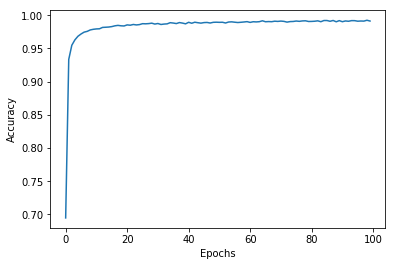

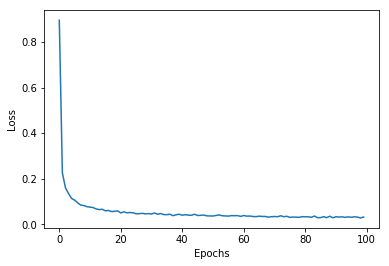

In [85]:
# Lets visualize loss and accuracy over epochs

accuracy = history.history['acc']
loss = history.history['loss']
epochs = range(100) 
plt.plot(epochs, accuracy, label = "Accuracy")
plt.xlabel("Epochs")
plt.ylabel("Accuracy")
plt.show()
plt.plot(epochs, loss, label = "Loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.show()


## Comment

Accuracy and Loss both seems to be converging with accuracy close to 1, and loss close to 0. We have to test it on test data.

In [86]:
predictions = model.predict(test)
predictions = np.argmax(predictions,axis = 1)
predictions = pd.Series(predictions,name="Label")

predictions.head()

0    2
1    0
2    9
3    0
4    3
Name: Label, dtype: int64

In [0]:


submission = pd.concat([pd.Series(range(1,28001),name = "ImageId"), predictions],axis = 1)

submission.to_csv("submission.csv",index=False)

